In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
news = pd.read_csv("OnlineNewsPopularity.csv")

In [10]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [11]:
news.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [12]:
news.columns = [i.strip() for i in news.columns]

In [13]:
news = news.drop(['timedelta','url'],axis=1)

# Number of words in the title

(array([3.4000e+01, 9.8900e+02, 6.3470e+03, 1.3636e+04, 1.2259e+04,
        5.2420e+03, 1.0150e+03, 1.1300e+02, 8.0000e+00, 1.0000e+00]),
 array([ 2. ,  4.1,  6.2,  8.3, 10.4, 12.5, 14.6, 16.7, 18.8, 20.9, 23. ]),
 <a list of 10 Patch objects>)

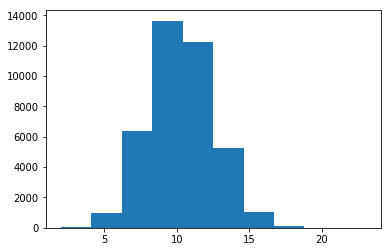

In [64]:
plt.hist(news['n_tokens_title'])

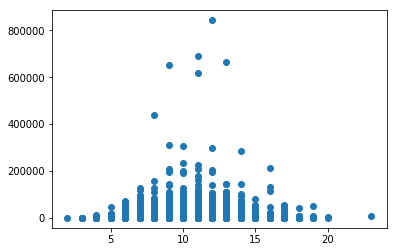

In [65]:
plt.scatter(news['n_tokens_title'],news['shares'])

The title of an article is probably the first thing that a user sees when interacting with an article. It could be the factor upon which a user decides whether to click on the link or not. Thus, shares may be influenced significantly by the length of the title, as that could lead to more views and potentially more shares. In this regard, a title may be too short or too long

# Number of words in the article vs. Shares

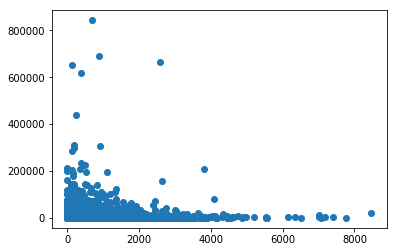

In [67]:
plt.scatter(news['n_tokens_content'],y=news['shares'])

The length of the article may also be a determining factor in whether an article gets shared or not. An article that is too long may discourage readers from finishing it and consequently decreasing the chances of resharing.

# Number of images vs. Shares

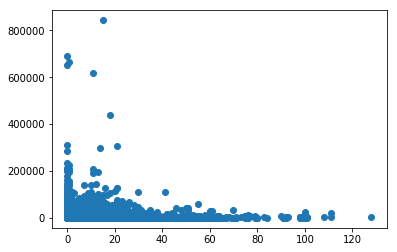

In [68]:
plt.scatter(news['num_imgs'],news['shares'])

# Number of videos in the article vs. Shares

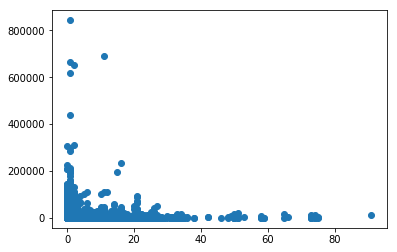

In [69]:
plt.scatter(news['num_videos'],news['shares'])

# Number of articles published per day

In [38]:
num_of_items_per_weekday = []
mean_shares_per_weekday = []
days_of_weeks = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
for i in days_of_weeks:
    que = 'weekday_is_'+i+'==1.0'
    num_of_items_per_weekday.append(len(news.query(que)))
    mean_shares_per_weekday.append(news.query(que)['shares'].mean())

In [24]:
num_of_items_per_weekday

[6661, 7390, 7435, 7267, 5701, 2453, 2737]

In [39]:
mean_shares_per_weekday

[3647.0258219486564,
 3202.5006765899866,
 3303.4053799596504,
 3178.5991468281272,
 3285.181020873531,
 4078.1850794944967,
 3746.7405918889294]

There is a non-negligible increase in the number of shares on Saturday and Sunday when compared to the remaining days of the week. Also, Monday has a higher mean shares than the other weekdays.

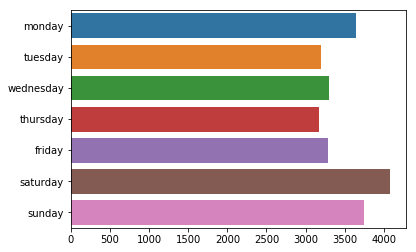

In [40]:
sns.barplot(mean_shares_per_weekday,days_of_weeks)

# Number of articles published per channel

In [33]:
num_of_items_per_channel = []
mean_shares_per_channel = []
channel = ['lifestyle','bus','entertainment','socmed','tech','world']
for i in channel:
    que = 'data_channel_is_'+i+'==1.0'
    num_of_items_per_channel.append(len(news.query(que)))
    mean_shares_per_channel.append(news.query(que)['shares'].mean())

In [26]:
num_of_items_per_channel

[2099, 6258, 7057, 2323, 7346, 8427]

In [34]:
mean_shares_per_channel

[3682.123392091472,
 3063.0185362735697,
 2970.487034150489,
 3629.383125269049,
 3072.283283419548,
 2287.734069063724]

## Mean shares by channel

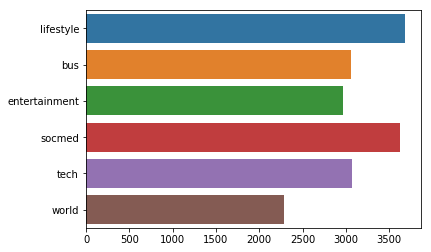

In [37]:
sns.barplot(mean_shares_per_channel,channel)

In [30]:
news.query('data_channel_is_bus==1.0')['shares'].mean()

3063.0185362735697